In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder #get_dummies
import seaborn as sns 
from sklearn.compose import ColumnTransformer

**Vamos a analizar el data set de Housing California**

---



# Importo el dataset

In [234]:
df = pd.read_csv('https://raw.githubusercontent.com/IAI-UNSAM/datasets/master/students/student-mat.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


#Analisis de datos

con las funciones basicas de pandas comenzamos a visualizar los datos.

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [236]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [237]:
df.shape

(395, 33)

In [238]:
df.describe().T.style.set_properties(**{'background-color': 'grey','color': 'white','border-color': 'white'})

,count,mean,std,min,25%,50%,75%,max
age,395.000000,16.696203,1.276043,15.000000,16.000000,17.000000,18.000000,22.000000
Medu,395.000000,2.749367,1.094735,0.000000,2.000000,3.000000,4.000000,4.000000
Fedu,395.000000,2.521519,1.088201,0.000000,2.000000,2.000000,3.000000,4.000000
traveltime,395.000000,1.448101,0.697505,1.000000,1.000000,1.000000,2.000000,4.000000
studytime,395.000000,2.035443,0.839240,1.000000,1.000000,2.000000,2.000000,4.000000
failures,395.000000,0.334177,0.743651,0.000000,0.000000,0.000000,0.000000,3.000000
famrel,395.000000,3.944304,0.896659,1.000000,4.000000,4.000000,5.000000,5.000000
freetime,395.000000,3.235443,0.998862,1.000000,3.000000,3.000000,4.000000,5.000000
goout,395.000000,3.108861,1.113278,1.000000,2.000000,3.000000,4.000000,5.000000
Dalc,395.000000,1.481013,0.890741,1.000000,1.000000,1.000000,2.000000,5.000000


In [239]:
df['G3'].value_counts()

10    56
11    47
0     38
15    33
8     32
13    31
12    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
20     1
4      1
Name: G3, dtype: int64

In [240]:
df.duplicated().sum()

0

In [241]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [242]:
df.dtypes.value_counts()

object    17
int64     16
dtype: int64

In [243]:
for i in list(df.columns):
    
    # get a list of unique values
    
    n = df[i].unique()
    print(i)
    print(n)
    print('\n')
   

school
['GP' 'MS']


sex
['F' 'M']


age
[18 17 15 16 19 22 20 21]


address
['U' 'R']


famsize
['GT3' 'LE3']


Pstatus
['A' 'T']


Medu
[4 1 3 2 0]


Fedu
[4 1 2 3 0]


Mjob
['at_home' 'health' 'other' 'services' 'teacher']


Fjob
['teacher' 'other' 'services' 'health' 'at_home']


reason
['course' 'other' 'home' 'reputation']


guardian
['mother' 'father' 'other']


traveltime
[2 1 3 4]


studytime
[2 3 1 4]


failures
[0 3 2 1]


schoolsup
['yes' 'no']


famsup
['no' 'yes']


paid
['no' 'yes']


activities
['no' 'yes']


nursery
['yes' 'no']


higher
['yes' 'no']


internet
['no' 'yes']


romantic
['no' 'yes']


famrel
[4 5 3 1 2]


freetime
[3 2 4 1 5]


goout
[4 3 2 1 5]


Dalc
[1 2 5 3 4]


Walc
[1 3 2 4 5]


health
[3 5 1 2 4]


absences
[ 6  4 10  2  0 16 14  7  8 25 12 54 18 26 20 56 24 28  5 13 15 22  3 21
  1 75 30 19  9 11 38 40 23 17]


G1
[ 5  7 15  6 12 16 14 10 13  8 11  9 17 19 18  4  3]


G2
[ 6  5  8 14 10 15 12 18 16 13  9 11  7 19 17  4  0]


G3
[ 6 10 15 11 19  9

Una buena forma de empezar a visualizar los datos es graficar features vs features

In [244]:
df['G3'].value_counts().sort_index(ascending=True)

0     38
4      1
5      7
6     15
7      9
8     32
9     28
10    56
11    47
12    31
13    31
14    27
15    33
16    16
17     6
18    12
19     5
20     1
Name: G3, dtype: int64

In [245]:
df.shape

(395, 33)

In [246]:
df_index=df[df["G3"] == 0].index
df=df.drop(df_index)
df.shape

(357, 33)

In [247]:
df[df['G3']>11].shape

(162, 33)

In [248]:
df[df['G3']>11].shape

(162, 33)

In [249]:
df['studytime'].value_counts()

2    182
1     92
3     59
4     24
Name: studytime, dtype: int64

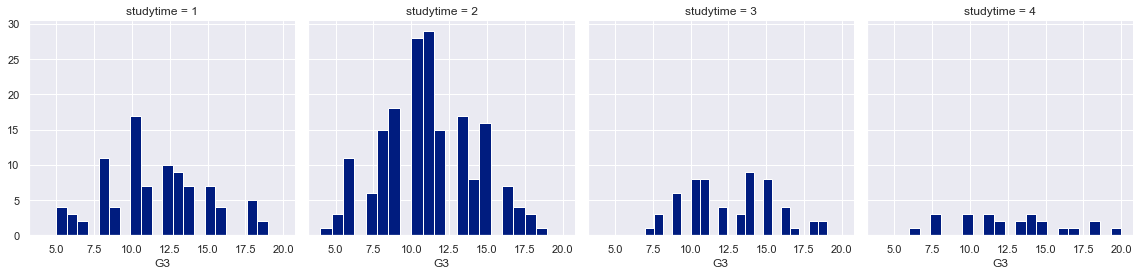

In [250]:
g = sns.FacetGrid(df, col='studytime', height=4, sharey= True)
g.map(plt.hist, 'G3', bins=20)

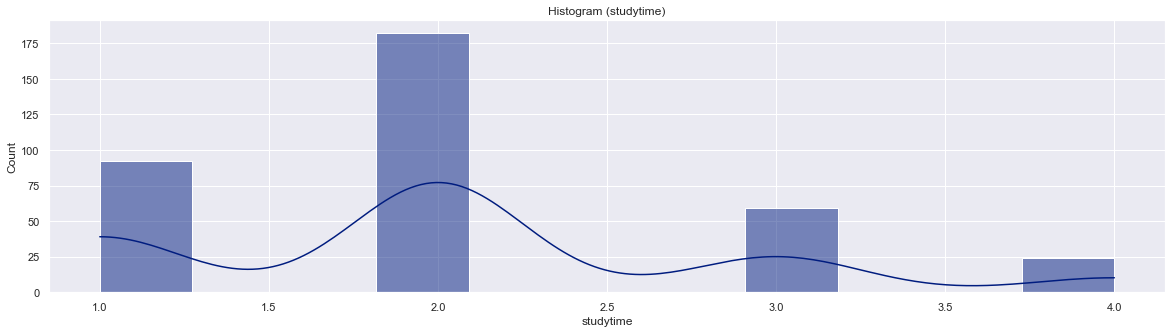

In [251]:
plt.figure(figsize = (20,5))
sns.histplot(x = "studytime", data = df, kde =True)
plt.title("Histogram (studytime)")
plt.show()

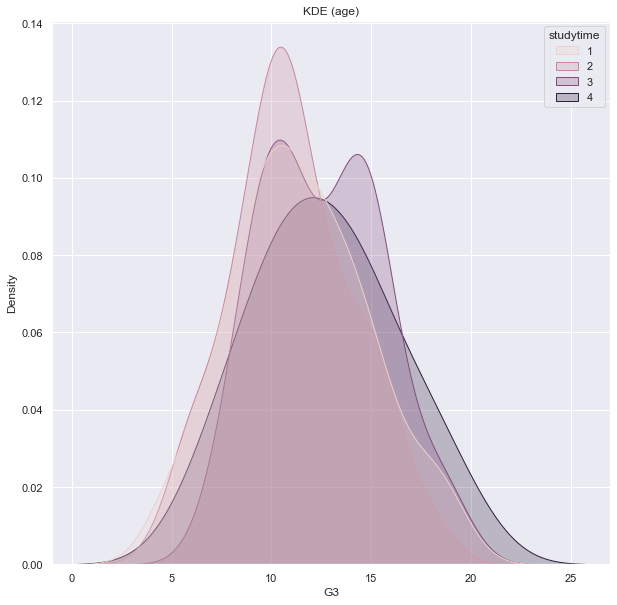

In [252]:
plt.figure(figsize = (10,10))
sns.kdeplot(x = "G3", data = df,hue = 'studytime', fill = True, common_norm = False)
plt.title("KDE (age)")
plt.show()

In [253]:
df['failures'].value_counts()

0    294
1     40
2     12
3     11
Name: failures, dtype: int64

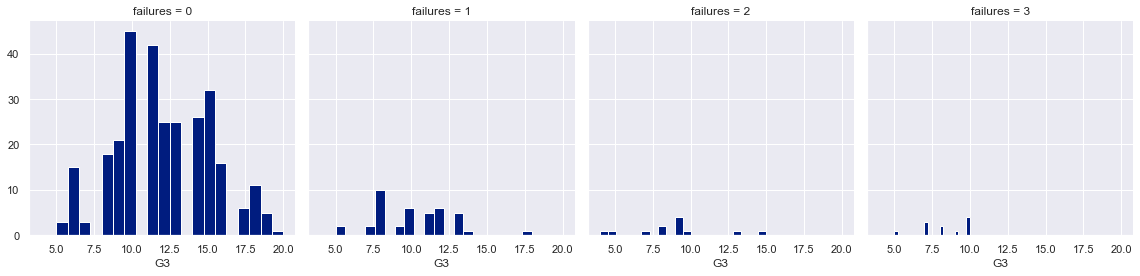

In [254]:
g = sns.FacetGrid(df, col='failures', height=4, sharey= True)
g.map(plt.hist, 'G3', bins=20)

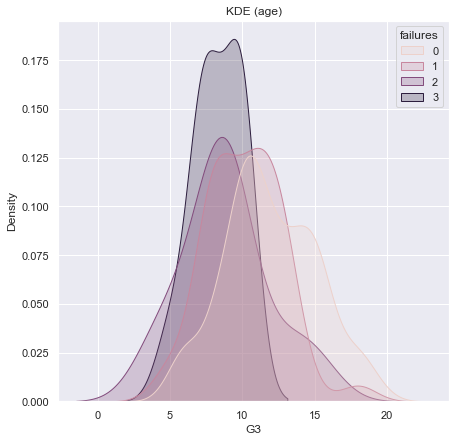

In [255]:
plt.figure(figsize = (7,7))
sns.kdeplot(x = "G3", data = df,hue = 'failures', fill = True, common_norm = False)
plt.title("KDE (age)")
plt.show()

In [256]:
df['higher'].value_counts() #NO ES DISTINTIVO

yes    343
no      14
Name: higher, dtype: int64

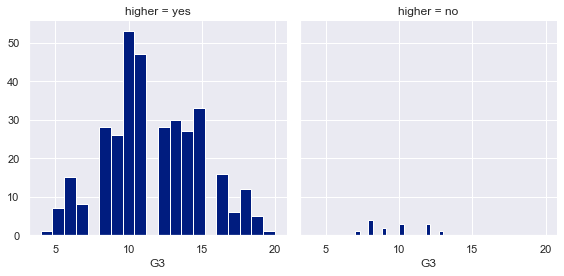

In [352]:
g = sns.FacetGrid(df, col='higher', height=4, sharey= True)
g.map(plt.hist, 'G3', bins=20)
#tienen baja nota

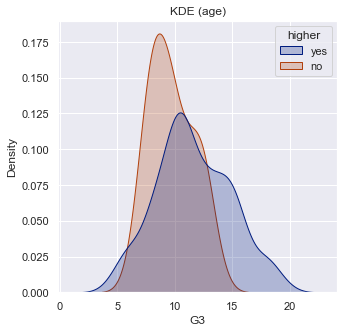

In [354]:
plt.figure(figsize = (5,5))
sns.kdeplot(x = "G3", data = df,hue = 'higher', fill = True, common_norm = False)
plt.title("KDE (age)")
plt.show()

In [257]:
df['schoolsup'].value_counts() 

no     307
yes     50
Name: schoolsup, dtype: int64

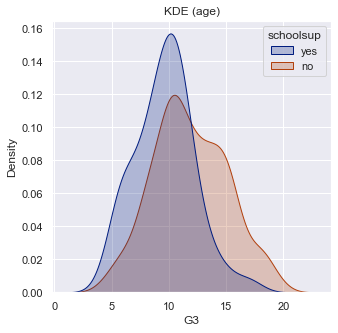

In [258]:
plt.figure(figsize = (5,5))
sns.kdeplot(x = "G3", data = df,hue = 'schoolsup', fill = True, common_norm = False)
plt.title("KDE (age)")
plt.show()

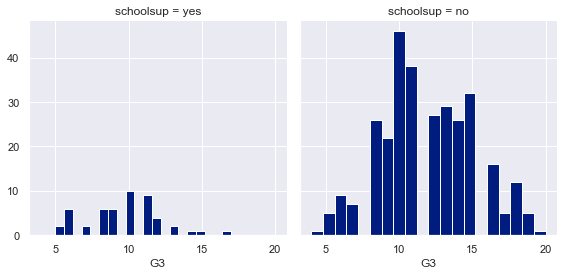

In [259]:
g = sns.FacetGrid(df, col='schoolsup', height=4, sharey= True)
g.map(plt.hist, 'G3', bins=20)
#los que toman clases desaprueban

In [260]:
df['famsup'].value_counts() 

yes    219
no     138
Name: famsup, dtype: int64

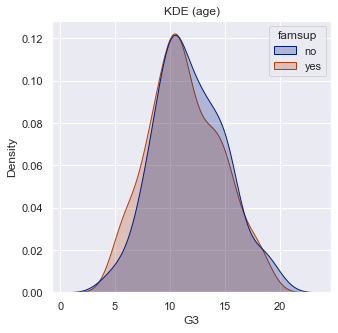

In [261]:
plt.figure(figsize = (5,5))
sns.kdeplot(x = "G3", data = df,hue = 'famsup', fill = True, common_norm = False)
plt.title("KDE (age)")
plt.show()

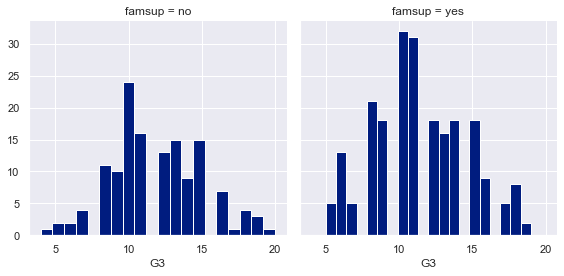

In [262]:
g = sns.FacetGrid(df, col='famsup', height=4, sharey= True)
g.map(plt.hist, 'G3', bins=20)
#los que tienen clases de apoyo familiar aprueban

In [263]:
df['paid'].value_counts()

no     184
yes    173
Name: paid, dtype: int64

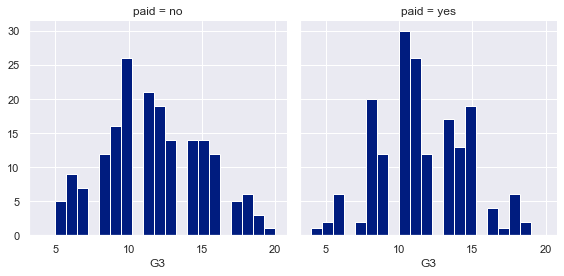

In [264]:
g = sns.FacetGrid(df, col='paid', height=4, sharey= True)
g.map(plt.hist, 'G3', bins=20)
#los que pagan aprueban

In [265]:
df['absences'].value_counts()

0     77
2     65
4     53
6     31
8     22
10    17
14    12
12    12
3      8
16     7
7      7
5      5
18     5
20     4
11     3
9      3
13     3
15     3
22     3
1      3
38     1
30     1
40     1
23     1
19     1
28     1
75     1
21     1
24     1
56     1
26     1
54     1
25     1
17     1
Name: absences, dtype: int64

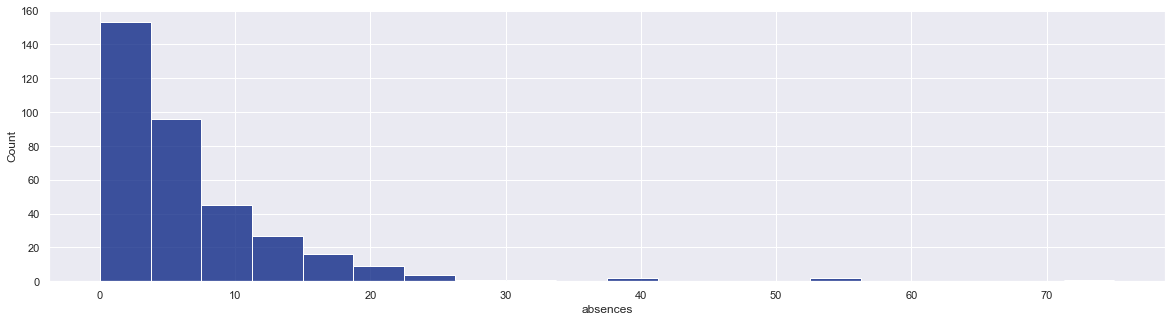

In [266]:
plt.figure(figsize = (20,5))
sns.histplot( df["absences"], bins = 20)
#los que tienen mayores faltas desaprueban
plt.show()

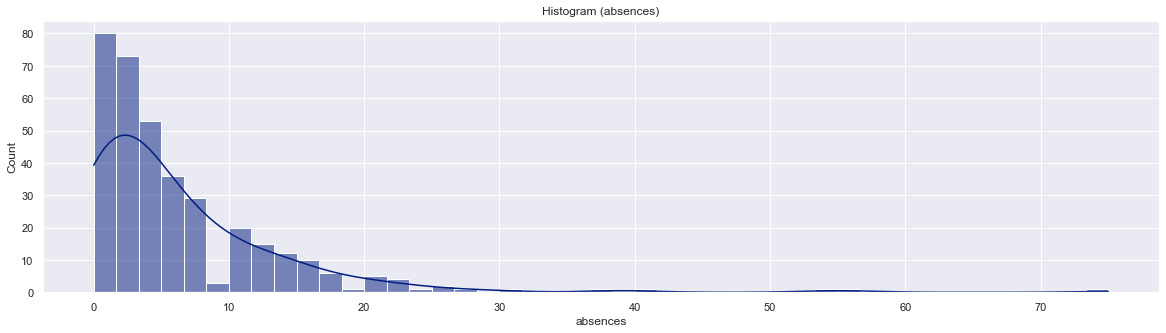

In [267]:
plt.figure(figsize = (20,5))
sns.histplot(x = "absences", data = df, kde =True)
plt.title("Histogram (absences)")
plt.show()

In [268]:
df['freetime'].value_counts()

3    136
4    106
2     60
5     38
1     17
Name: freetime, dtype: int64

<Figure size 1440x360 with 0 Axes>

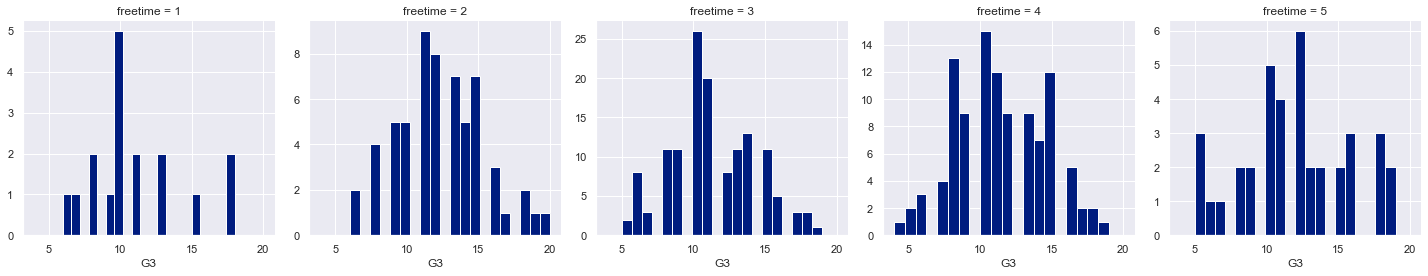

In [269]:
plt.figure(figsize = (20,5))
g = sns.FacetGrid(df, col='freetime', height=4, sharey= False)
g.map(plt.hist, 'G3', bins=20)

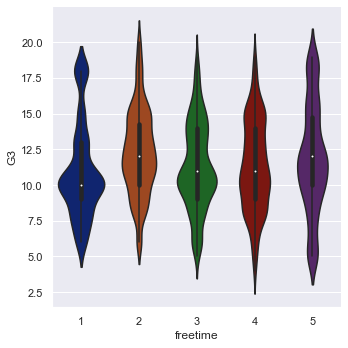

In [270]:

sns.catplot(x = 'freetime', y ='G3' , data = df, kind = "violin", bw = 0.25);

In [271]:
df['goout'].value_counts()

3    122
2     94
4     77
5     45
1     19
Name: goout, dtype: int64

<Figure size 1440x360 with 0 Axes>

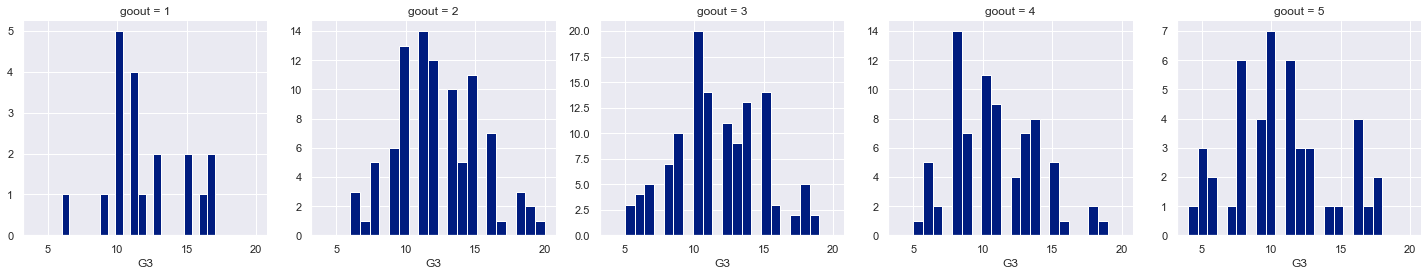

In [272]:
plt.figure(figsize = (20,5))
g = sns.FacetGrid(df, col='goout', height=4, sharey= False)
g.map(plt.hist, 'G3', bins=20)

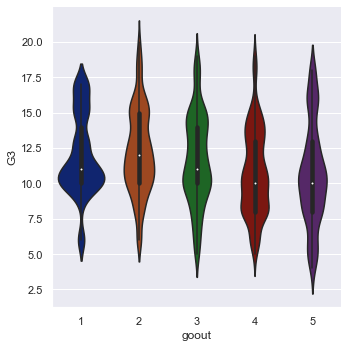

In [273]:
sns.catplot(x = 'goout', y ='G3' , data = df, kind = "violin", bw = 0.25);

In [274]:
df['Dalc'].value_counts()

1    250
2     64
3     25
5      9
4      9
Name: Dalc, dtype: int64

<Figure size 1440x360 with 0 Axes>

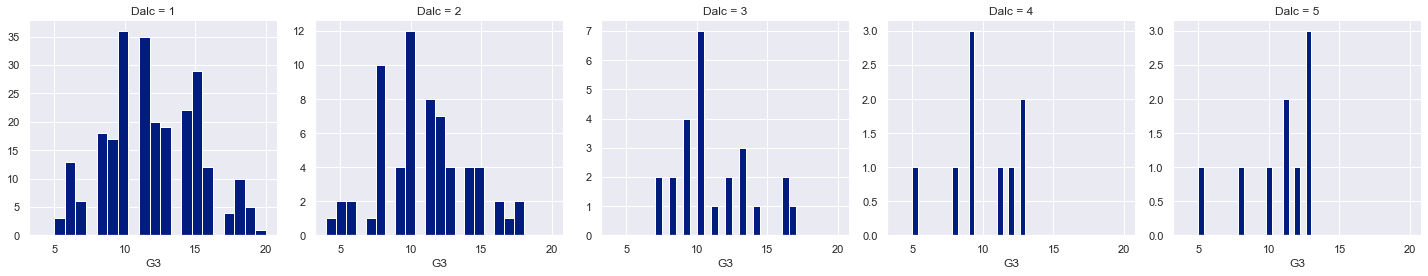

In [275]:
plt.figure(figsize = (20,5))
g = sns.FacetGrid(df, col='Dalc', height=4, sharey= False)
g.map(plt.hist, 'G3', bins=20)

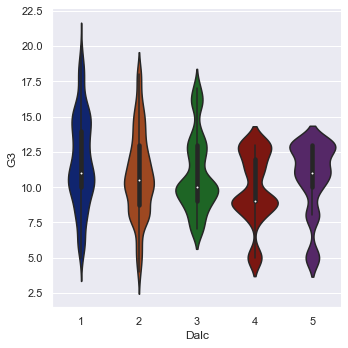

In [276]:
sns.catplot(x = 'Dalc', y ='G3' , data = df, kind = "violin", bw = 0.25);

In [277]:
df['Walc'].value_counts()

1    133
3     77
2     73
4     48
5     26
Name: Walc, dtype: int64

<Figure size 1440x360 with 0 Axes>

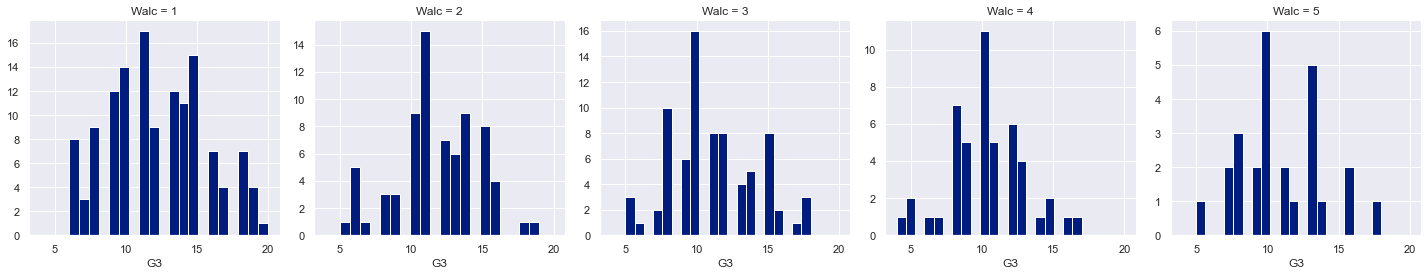

In [278]:
plt.figure(figsize = (20,5))
g = sns.FacetGrid(df, col='Walc', height=4, sharey= False)
g.map(plt.hist, 'G3', bins=20)

In [279]:
numerical_columns = [x for x in df.columns if df[x].dtype != 'object' and df[x].dtype != 'bool']

cat_columns = [x for x in df.columns if x not in numerical_columns]

TypeError: tight_layout() got an unexpected keyword argument 'fontsize'

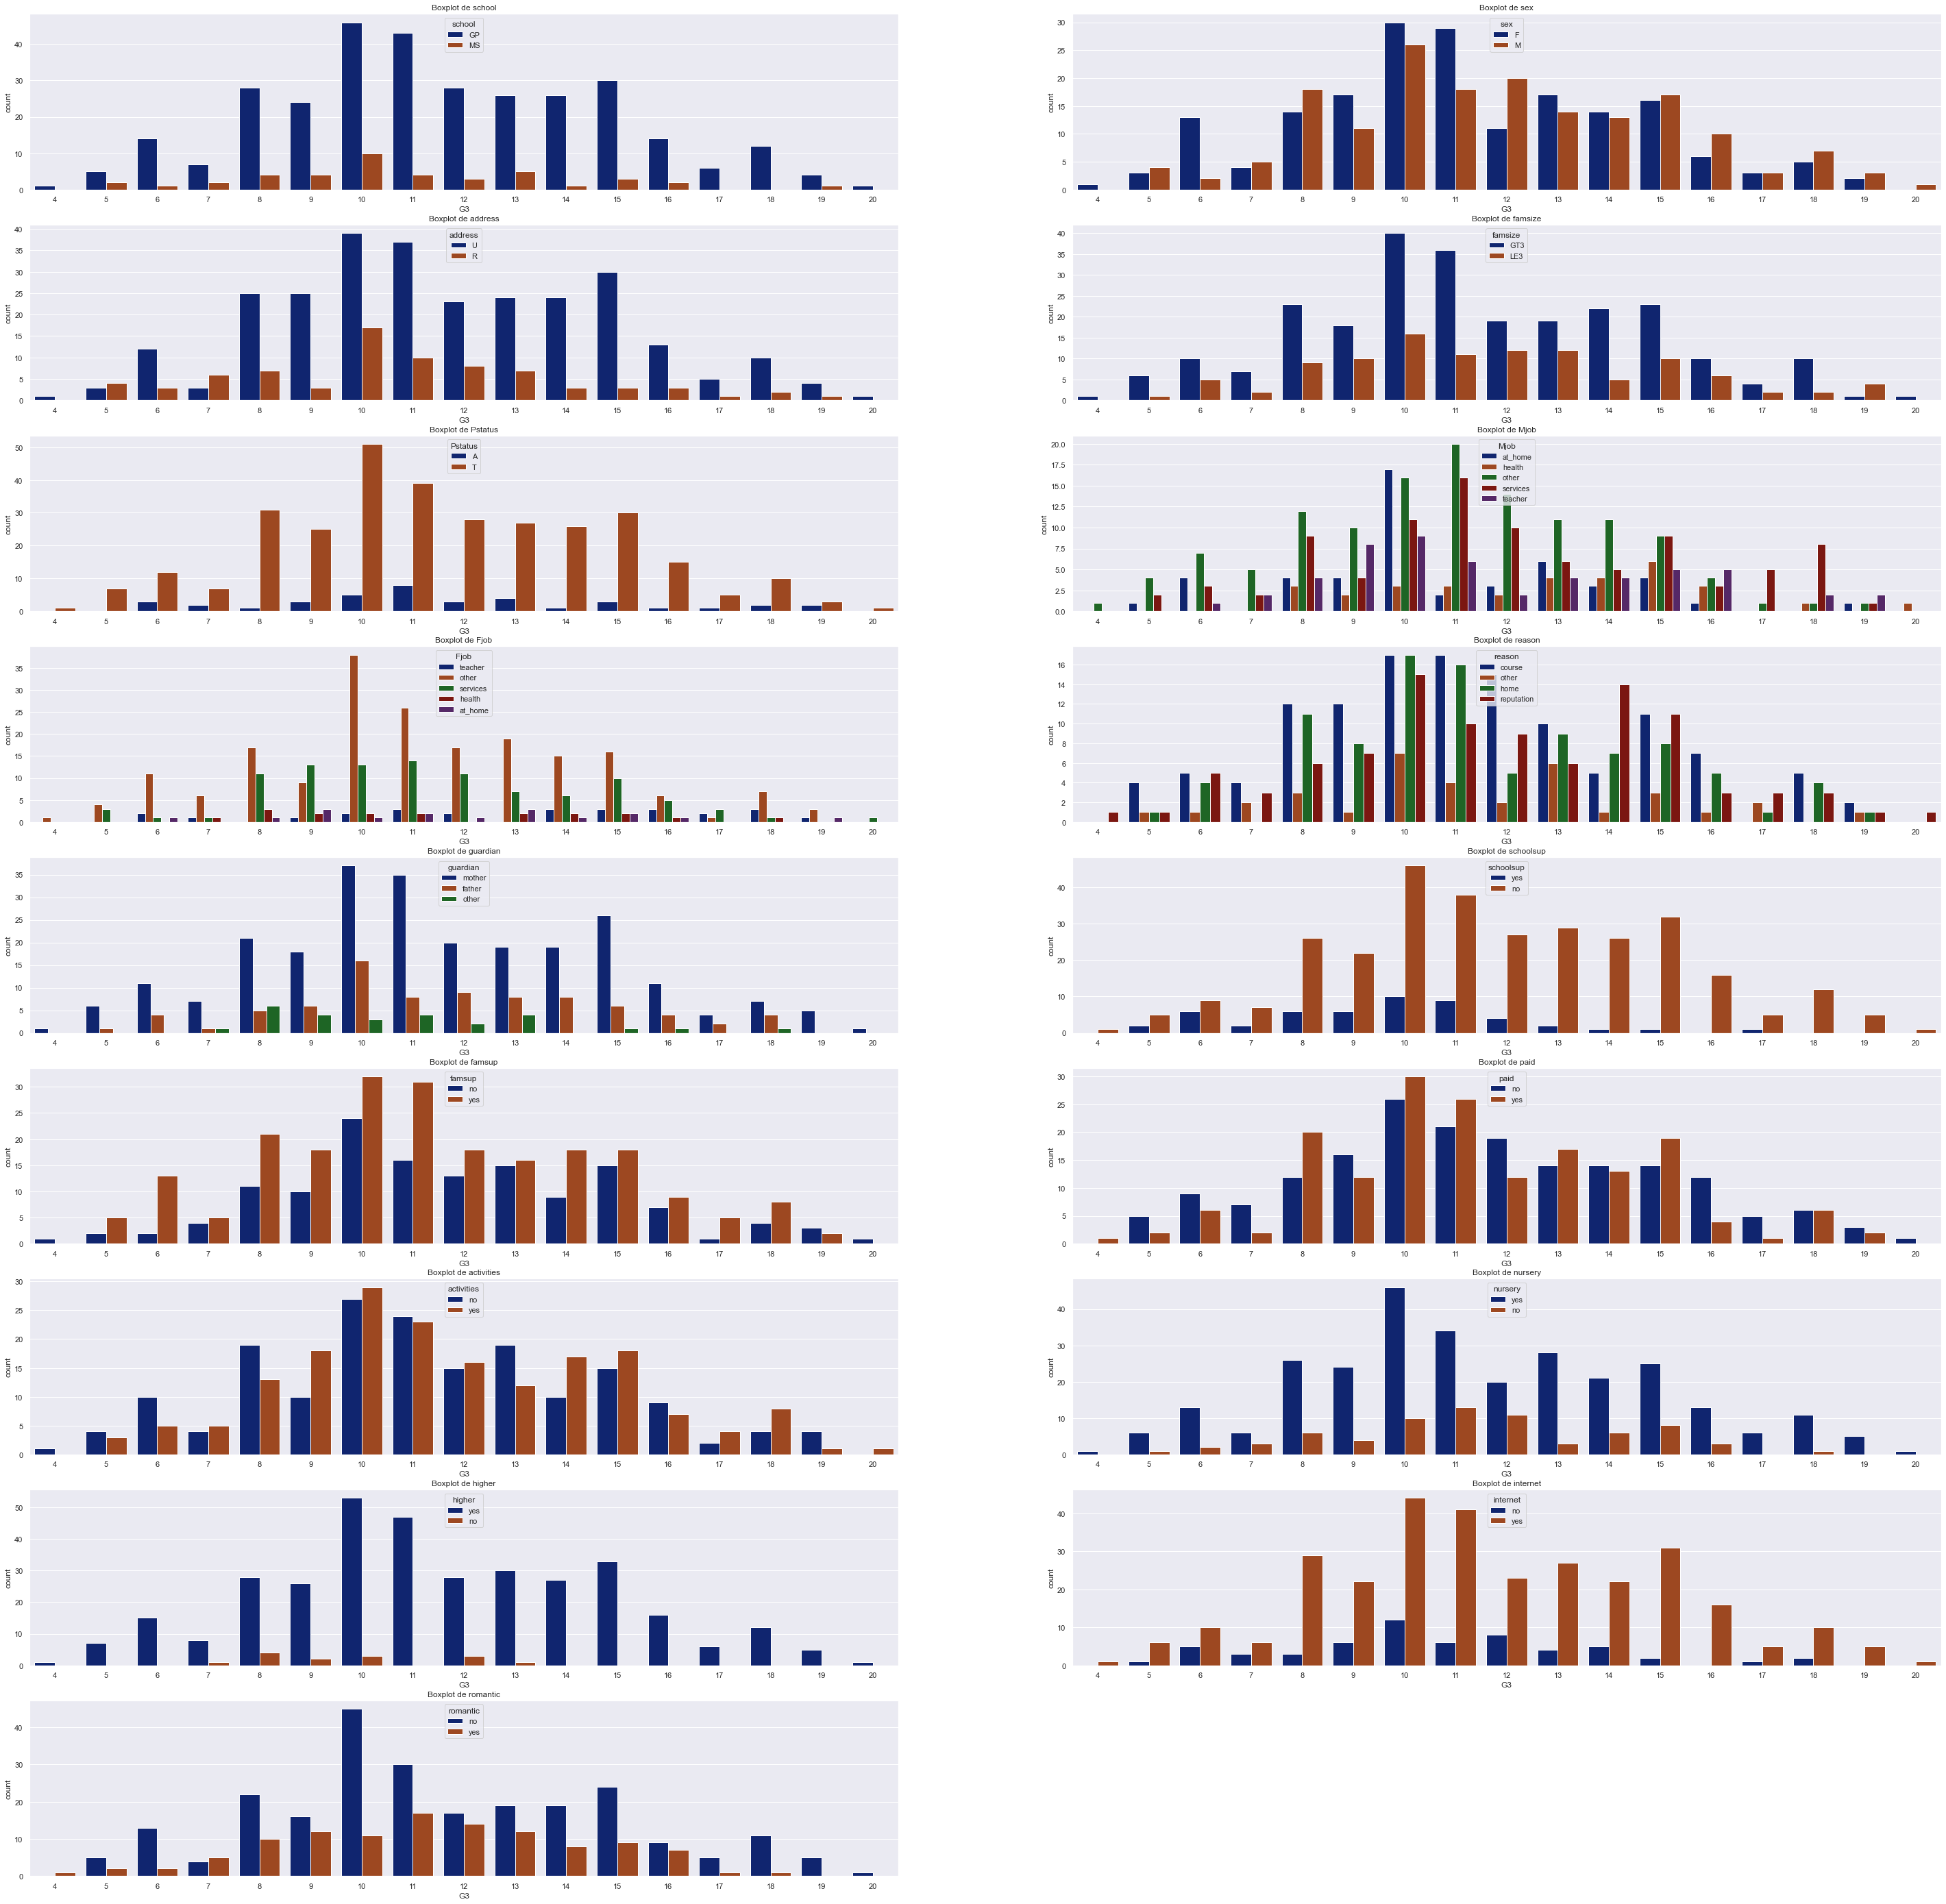

In [364]:
from math import ceil
plt.figure(figsize=(50,50)) 

sns.set_theme(palette='dark')

for index, column in enumerate(cat_columns):

  plt.subplot(ceil(len(numerical_columns)/2+1),2, index+1)

  sns.countplot(data=df, x='G3', hue=df[column])

  plt.title('Boxplot de {}'.format(column))

plt.tight_layout()

#no SIRVE
plt.figure(figsize = (20,5))
plt.scatter( df['G3'],df["goout"], alpha = 0.5)

plt.show()

Pandas nos da una función que hace esto para todos las columnas

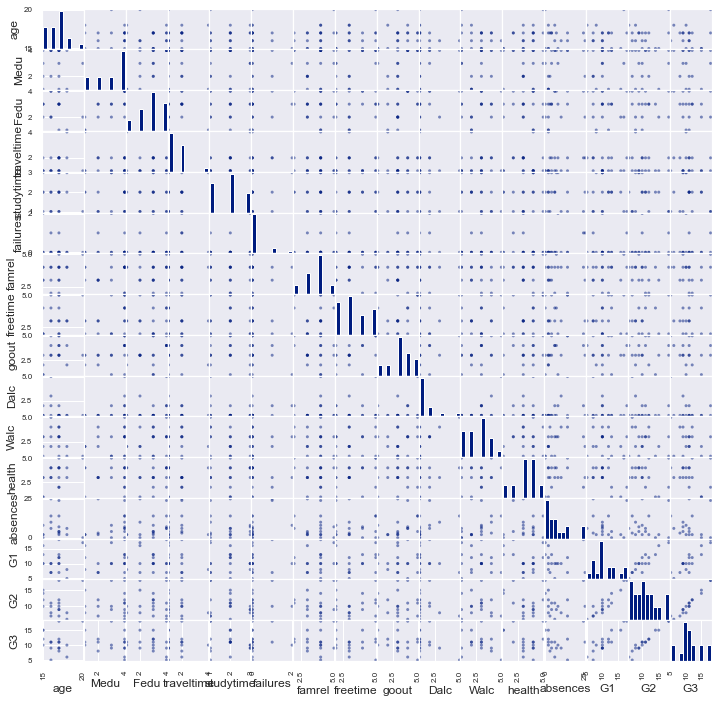

In [281]:
_=pd.plotting.scatter_matrix(df.iloc[::20], figsize=(12, 12), alpha=0.5)

Podemos armar tambien la matriz de correlación de las variables. Esta matriz nos dice que tan correlacionadas linealmente estan las variables mediante el correlación de Pearson.
[Wikipedia](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient):

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg">

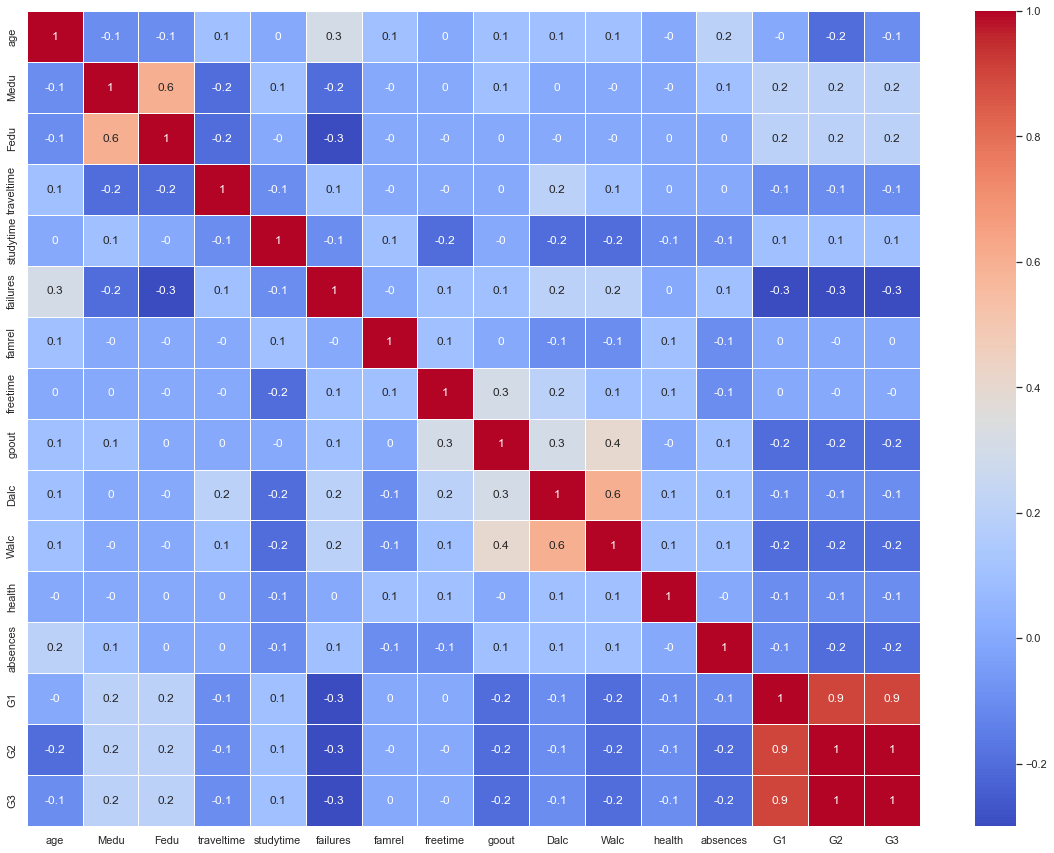

In [282]:
plt.figure(figsize=(20,15))
sns.heatmap(round(df.corr(),1), cmap="coolwarm", annot=True, linewidths=.5)

plt.show()

Tambien graficamos los histogramas de cada variables, para entender como es su distribución

De nuevo, pandas nos da una función que lo hace para todas las columnas

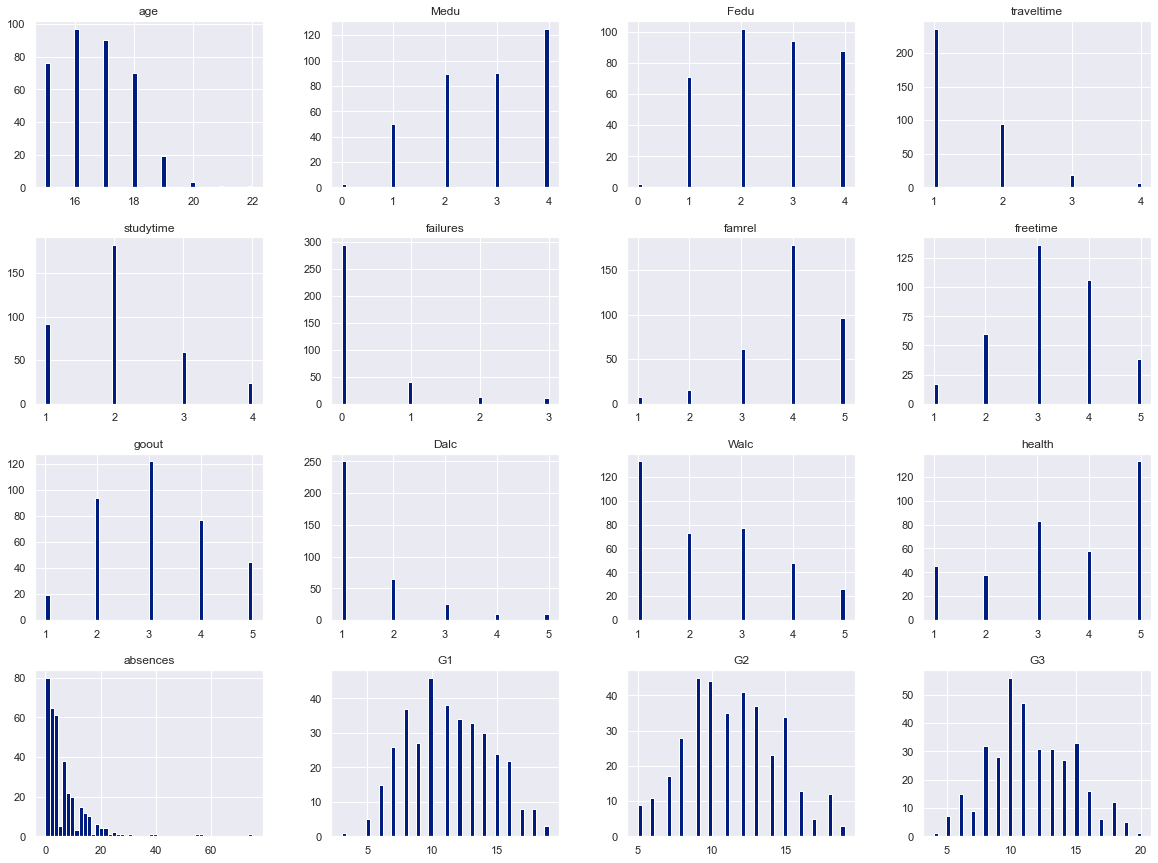

In [283]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Notan algo??

# Definion del problema y label

Hay que pensar que queremos predecir...opciones...

In [307]:
data= df[['studytime','failures','paid','absences','Dalc','goout','G3']].copy().reset_index(drop=True)
target = df[['G3']].copy().reset_index()

In [308]:
data

,studytime,failures,paid,absences,Dalc,goout,G3
0,2,0,no,6,1,4,6
1,2,0,no,4,1,3,6
2,2,3,yes,10,2,2,10
3,3,0,yes,2,1,2,15
4,2,0,yes,4,1,2,10
...,...,...,...,...,...,...,...
352,2,2,yes,11,4,4,9
353,1,0,no,3,3,5,16
354,1,3,no,3,3,3,7
355,1,0,no,0,3,1,10


In [302]:
data.describe()

,studytime,failures,absences,Dalc,goout,G3
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,2.042017,0.271709,6.316527,1.495798,3.098039,11.523810
std,0.831895,0.671750,8.187623,0.919886,1.090779,3.227797
min,1.000000,0.000000,0.000000,1.000000,1.000000,4.000000
25%,1.000000,0.000000,2.000000,1.000000,2.000000,9.000000
50%,2.000000,0.000000,4.000000,1.000000,3.000000,11.000000
75%,2.000000,0.000000,8.000000,2.000000,4.000000,14.000000
max,4.000000,3.000000,75.000000,5.000000,5.000000,20.000000


In [303]:
target.drop('index',axis = 1, inplace=True)

In [304]:
target

,G3
0,6
1,6
2,10
3,15
4,10
...,...
352,9
353,16
354,7
355,10


In [305]:
data= pd.get_dummies(data, columns = ['paid'], drop_first=True)
data

,studytime,failures,absences,Dalc,goout,G3,paid_yes
0,2,0,6,1,4,6,0
1,2,0,4,1,3,6,0
2,2,3,10,2,2,10,1
3,3,0,2,1,2,15,1
4,2,0,4,1,2,10,1
...,...,...,...,...,...,...,...
352,2,2,11,4,4,9,1
353,1,0,3,3,5,16,0
354,1,3,3,3,3,7,0
355,1,0,0,3,1,10,0


In [306]:
dataScale = data.copy()
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
sc= scaler.fit_transform(dataScale.values)
df_scaled= pd.DataFrame(sc, index=dataScale.index, columns=dataScale.columns)
dataScale=df_scaled
dataScale

,studytime,failures,absences,Dalc,goout,G3,paid_yes
0,-0.050578,-0.405047,-0.038713,-0.539734,0.828056,-1.713727,-0.969648
1,-0.050578,-0.405047,-0.283327,-0.539734,-0.090006,-1.713727,-0.969648
2,-0.050578,4.067169,0.450515,0.548883,-1.008069,-0.472752,1.031302
3,1.153183,-0.405047,-0.527941,-0.539734,-1.008069,1.078466,1.031302
4,-0.050578,-0.405047,-0.283327,-0.539734,-1.008069,-0.472752,1.031302
...,...,...,...,...,...,...,...
352,-0.050578,2.576431,0.572822,2.726117,0.828056,-0.782996,1.031302
353,-1.254340,-0.405047,-0.405634,1.637500,1.746119,1.388710,-0.969648
354,-1.254340,4.067169,-0.405634,1.637500,-0.090006,-1.403483,-0.969648
355,-1.254340,-0.405047,-0.772555,1.637500,-1.926131,-0.472752,-0.969648


#Armamos el pipeline de preprocesado

# OneHotEncoder() 
para las variables categoricas (o get_dummies)


,index,studytime,failures,absences,Dalc,goout,paid_yes
0,-1.670947,-0.050578,-0.405047,-0.038713,-0.539734,0.828056,-0.969648
1,-1.662297,-0.050578,-0.405047,-0.283327,-0.539734,-0.090006,-0.969648
2,-1.653647,-0.050578,4.067169,0.450515,0.548883,-1.008069,1.031302
3,-1.644997,1.153183,-0.405047,-0.527941,-0.539734,-1.008069,1.031302
4,-1.636347,-0.050578,-0.405047,-0.283327,-0.539734,-1.008069,1.031302
...,...,...,...,...,...,...,...
352,1.702493,-0.050578,2.576431,0.572822,2.726117,0.828056,1.031302
353,1.711143,-1.254340,-0.405047,-0.405634,1.637500,1.746119,-0.969648
354,1.719793,-1.254340,4.067169,-0.405634,1.637500,-0.090006,-0.969648
355,1.728443,-1.254340,-0.405047,-0.772555,1.637500,-1.926131,-0.969648


In [166]:

ohe=OneHotEncoder()


housing_cat_ohe=ohe.fit_transform(housing[['ocean_proximity']])

In [ ]:
housing_cat_ohe

<18570x5 sparse matrix of type '<class 'numpy.float64'>'
	with 18570 stored elements in Compressed Sparse Row format>

In [ ]:
housing_cat_ohe.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
ohe.get_feature_names_out(['ocean_proximity'])

In [ ]:
housing[['ocean_proximity']]

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
8,NEAR BAY
15,NEAR BAY
18,NEAR BAY
...,...
20635,INLAND
20636,INLAND
20637,INLAND
20638,INLAND


###Ahora si armamos el Pipeline

*ColumnTransformer* es una función que te permite aplicar distintas transformaciones a cada columna que se le indique.


In [ ]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="mean")),#hay mas opciones aca
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline=OneHotEncoder()

num_attribs = list(housing_num)

cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline , cat_attribs),
    ])

housing_data_pre= full_pipeline.fit_transform(housing_data)

In [ ]:
df = pd.DataFrame(housing_data_pre)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18570 entries, 0 to 18569
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       18570 non-null  float64
 1   1       18570 non-null  float64
 2   2       18570 non-null  float64
 3   3       18570 non-null  float64
 4   4       18570 non-null  float64
 5   5       18570 non-null  float64
 6   6       18570 non-null  float64
 7   7       18570 non-null  float64
 8   8       18570 non-null  float64
 9   9       18570 non-null  float64
 10  10      18570 non-null  float64
 11  11      18570 non-null  float64
 12  12      18570 non-null  float64
dtypes: float64(13)
memory usage: 1.8 MB


### Train y Test

Una vez procesados los datos, divido en Train y Test

In [315]:
X = dataScale.drop(["G3"], axis=1)
y = pd.DataFrame (dataScale["G3"])

In [316]:
y

,G3
0,-1.713727
1,-1.713727
2,-0.472752
3,1.078466
4,-0.472752
...,...
352,-0.782996
353,1.388710
354,-1.403483
355,-0.472752


In [317]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [318]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(249, 6) (249, 1)
(108, 6) (108, 1)


# Planteo un modelo de regresión

In [331]:
from sklearn.linear_model import LinearRegression


''' pseudo codigo '''

modelo = LinearRegression()

modelo.fit(x_train, y_train)


LinearRegression()

In [337]:
y_pred_train = modelo.predict(x_train)

print(y_pred_train)
print(y_train)

[[ 2.32423362e-01]
 [ 9.47553719e-02]
 [-8.30713777e-01]
 [ 2.02750480e-01]
 [ 4.60747402e-03]
 [ 5.91162670e-02]
 [ 1.06187522e-02]
 [ 3.04087542e-01]
 [-1.47454337e+00]
 [-2.63486828e-02]
 [ 9.85555743e-02]
 [-4.95776831e-03]
 [-5.91639342e-01]
 [ 4.28790617e-01]
 [ 3.13652785e-01]
 [ 2.94922829e-01]
 [ 1.14226504e-01]
 [ 2.04033754e-01]
 [ 1.59771767e-01]
 [-1.15613835e-01]
 [ 4.15749090e-02]
 [ 1.95455927e-01]
 [ 9.25991197e-02]
 [-4.71408265e-01]
 [ 1.34239735e-01]
 [-3.42206329e-01]
 [ 2.57955394e-01]
 [ 1.96739202e-01]
 [ 1.59771767e-01]
 [-4.80204707e-01]
 [ 3.39184817e-01]
 [ 8.44247208e-03]
 [-9.11327690e-04]
 [ 3.30606989e-01]
 [ 2.94922829e-01]
 [ 4.30320129e-01]
 [-3.24063260e-01]
 [ 1.30439532e-01]
 [ 3.17147135e-01]
 [-9.32352380e-02]
 [ 7.72590692e-02]
 [ 8.44247208e-03]
 [ 4.33132917e-01]
 [-3.65954879e-02]
 [ 9.85555743e-02]
 [ 1.59771767e-01]
 [ 1.06190775e-01]
 [ 2.21234197e-01]
 [-1.26165724e+00]
 [ 2.57955394e-01]
 [ 3.59198047e-01]
 [-1.09097850e-01]
 [-7.3537849

In [338]:
y_pred_test = modelo.predict(x_test)
print(y_pred_test)
print(y_test)

[[ 2.12410131e-01]
 [ 1.95455927e-01]
 [ 5.49021976e-03]
 [ 8.73664097e-02]
 [ 2.94922829e-01]
 [-4.55737335e-01]
 [-5.78919930e-02]
 [ 2.56672119e-01]
 [-1.04539119e+00]
 [ 9.85555743e-02]
 [-8.62816004e-02]
 [-3.40912795e-01]
 [ 1.59771767e-01]
 [-1.24532310e-01]
 [ 3.32419933e-03]
 [ 3.30606989e-01]
 [ 3.29619574e-01]
 [-1.30202673e-01]
 [-5.07162075e-01]
 [-1.93689822e-01]
 [-3.77024840e-01]
 [-2.22715937e-01]
 [ 2.76685350e-01]
 [ 3.30606989e-01]
 [-9.11327690e-04]
 [-1.57264218e-01]
 [-6.89072025e-01]
 [ 1.22804332e-01]
 [-7.94455528e-01]
 [ 1.47393737e-01]
 [ 9.16019367e-02]
 [ 3.93106456e-01]
 [-2.43716583e-01]
 [ 7.72590692e-02]
 [ 2.75729567e-02]
 [ 1.27039859e-01]
 [ 3.91823182e-01]
 [ 2.54495839e-01]
 [ 2.59731145e-01]
 [ 3.14936059e-01]
 [-3.42825539e-03]
 [ 2.38824909e-01]
 [ 2.21234197e-01]
 [ 6.97654380e-02]
 [-5.95261750e-02]
 [ 1.21521057e-01]
 [-4.93141655e-02]
 [ 1.10085654e-01]
 [ 1.47053089e-01]
 [ 1.38475262e-01]
 [ 5.31316544e-01]
 [ 3.22230612e-01]
 [-5.2237765

In [339]:
from sklearn.metrics import mean_squared_error

def rmse(y_train,y_pred):
  return np.sqrt(mean_squared_error(y_train,y_pred))

In [340]:
rmse(y_train,y_pred_train)

0.9338317485041275

In [341]:
rmse(y_test,y_pred_test)

0.9097661649405374

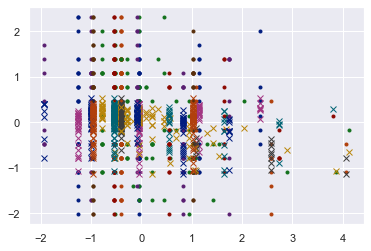

In [351]:
#plt.plot(x_test,y_test,".")
#plt.plot(x_test,y_pred_test,'x')

# Ridge

In [347]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures 

def ridge(m, lam):
    return Pipeline([('poly_features', PolynomialFeatures(degree=m)),
                     ('regressor', Ridge(alpha=lam/2.0, fit_intercept=False))])

# Fit Ridge
rr = ridge(2, 0.001)
rr.fit(x_train, y_train)

# Fit OLS
#pr21.fit(x_train, t_train)

Pipeline(steps=[('poly_features', PolynomialFeatures()),
                ('regressor', Ridge(alpha=0.0005, fit_intercept=False))])

NameError: name 'x_' is not defined

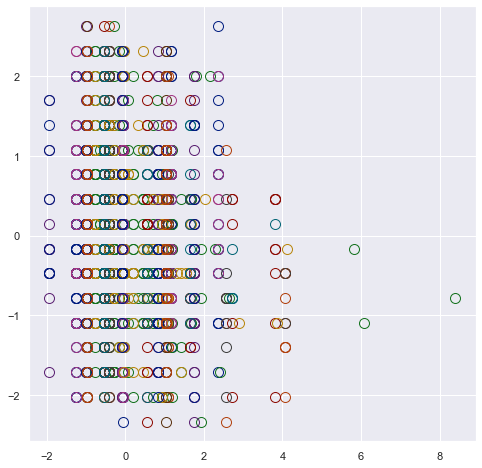

In [350]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.plot(x_train, y_train, 'o', ms=10, mfc='None', label='Train')
ax.plot(x_test, y_test, 'o', ms=10, mfc='None', label='Train')

ax.plot(x_, rr.predict(x_), 'r-', lw=3, alpha=0.8, label='ridge', zorder=2)
#ax.plot(x_, pr21.predict(x_), 'g-', lw=1, alpha=0.8, label='sin regularizar', zorder=0)
    #
ax.set_title('Degree: {}; $\lambda$: {:.2e}'.format(rr['poly_features'].degree, 
                                                    rr['regressor'].alpha *2), fontsize=16)
    #
ax.set_ylim(0, 3.9)
ax.legend(loc='best', fontsize=14)